# BRAZILLIAN OLIST E-COMMERCE

In [1]:
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as pyl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns 
import calendar
import datetime
init_notebook_mode(connected=True)

#### Loading the datasets

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
products_category = pd.read_csv('product_category_name_translation.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')

In [3]:
df = customers.merge(right = orders, how = 'left', on = 'customer_id')
df = df.merge(right = payments, on = 'order_id')
df = df.merge(right = items, on = 'order_id')
df = df.merge(right = products, on = 'product_id')
df = df.merge(right = order_reviews, on = 'order_id')
df = df.merge(right = products_category, on = 'product_category_name')

## EDA

### Customers Analysis

In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
#check for null values in the dataset
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

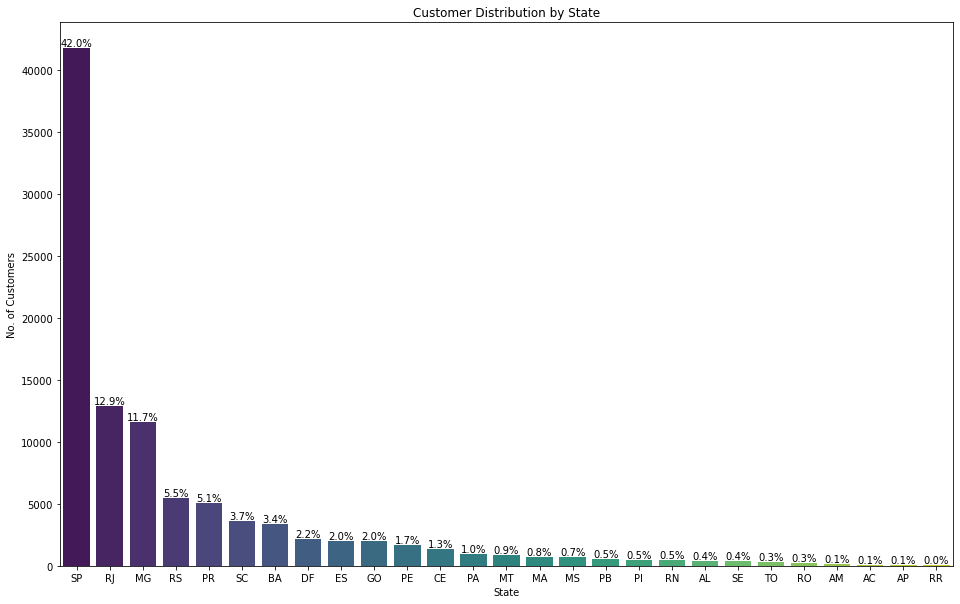

In [6]:
# Visualize the distribution of customers by state
state_counts = customers['customer_state'].value_counts()
plt.figure(figsize=(16, 10))
ax = sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')

# Add percentage labels on top of each bar
total = len(customers['customer_state'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Customer Distribution by State')
plt.xlabel('State')
plt.ylabel('No. of Customers')
plt.show()

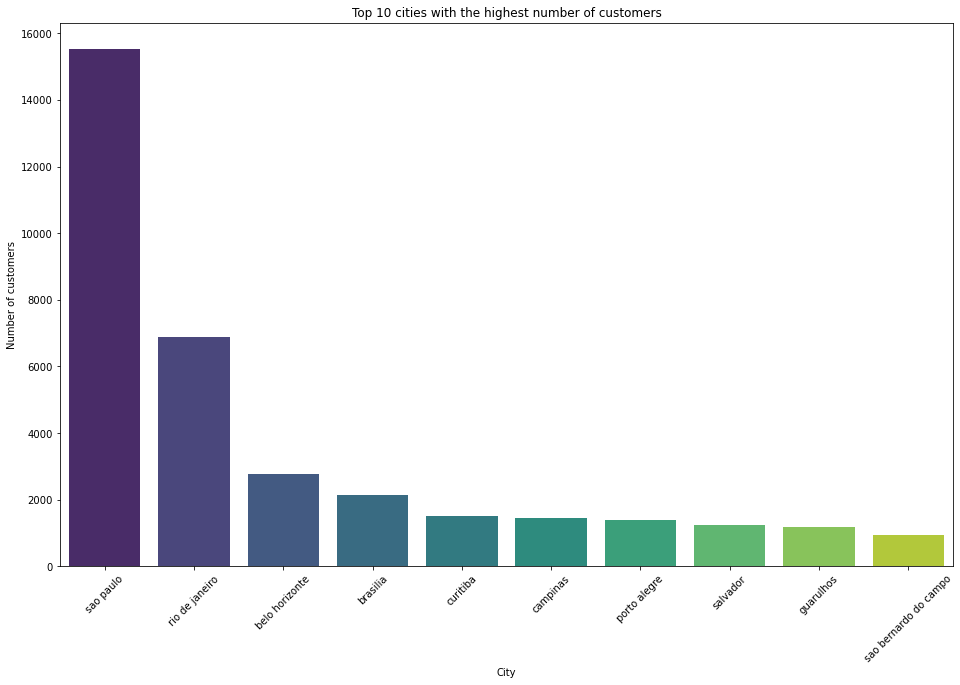

In [7]:
# Visualize the top 10 cities with the highest number of customers
city_counts = customers['customer_city'].value_counts().head(10)
plt.figure(figsize=(16, 10))
sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')
plt.title('Top 10 cities with the highest number of customers')
plt.xlabel('City')
plt.ylabel('Number of customers')
plt.xticks(rotation=45)
plt.show()

Most customers are from the states and cities of São Paulo (SP), Rio de Janeiro (RJ), and Belo Horizonte (MG). This is not too surprising because the highest populations of people in Brazil are also from these states and cities.


### Sellers Analysis

In [8]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


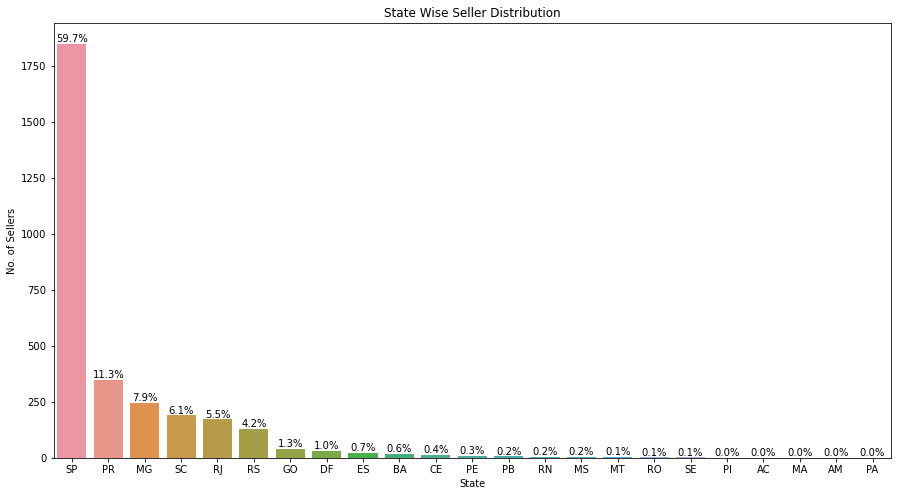

In [9]:
# Visualize the distribution of sellers by state
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='seller_state', data=sellers, order=sellers['seller_state'].value_counts().index)

# Add percentage labels on top of each bar
total = len(sellers['seller_state'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('State Wise Seller Distribution')
plt.xlabel('State')
plt.ylabel('No. of Sellers')
plt.show()

### As expected, the majority of sellers originate from the state of 'SP,' which aligns with the considerable customer base in that region. However, in contrast to the observed customer distribution graph, the state of 'PR' exhibits a notably higher concentration of sellers compared to 'RJ' and 'MG.' One would anticipate that the top three states in terms of customer count would also hold the same positions in the seller distribution. Evidently, 'PR' possesses a logistical advantage or some other facilitating factor that enables a larger number of sellers to effectively market their products.


### Orders Analysis

###### Positive and negative review analysis

In [10]:
product_order_merge_df = pd.merge(items,products)
product_order_merge_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


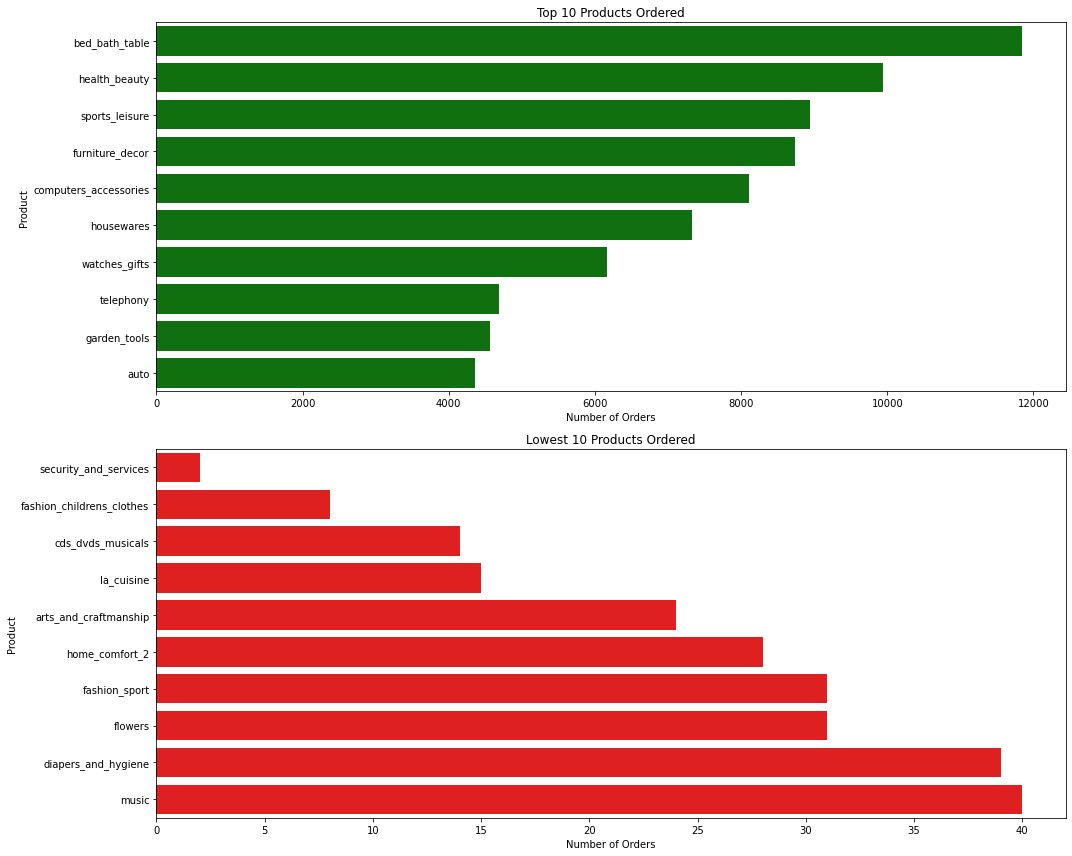

In [11]:
# Calculate the count of top and lowest 10 products ordered
top_products = df['product_category_name_english'].value_counts().reset_index().nlargest(10, 'product_category_name_english')
lowest_products = df['product_category_name_english'].value_counts().reset_index().nsmallest(10, 'product_category_name_english')

# Set colors
red_color = 'red'
green_color = 'green'

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Plot 1: Top 10 Products Ordered
plt.subplot(211)
sns.barplot(data=top_products, x='product_category_name_english', y='index', color=green_color)
plt.title('Top 10 Products Ordered')
plt.xlabel('Number of Orders')
plt.ylabel('Product')

# Plot 2: Lowest 10 Products Ordered
plt.subplot(212)
sns.barplot(data=lowest_products, x='product_category_name_english', y='index', color=red_color)
plt.title('Lowest 10 Products Ordered')
plt.xlabel('Number of Orders')
plt.ylabel('Product')

plt.tight_layout()  # Adjust the spacing between subplots

plt.show()


Bed and bath products are the top products ordered followed by beauty products, and sports leisure products.

Insurance services have the lowest amount of products ordered, followed by kids clothes, and pc gaming products.

### Reviews analysis

In [12]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [13]:
# checking for missing values
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [14]:
order_reviews.shape

(99224, 7)

As you can see, the columns review_comment_title and review_comment_message have more than 50% missing values. Hence, I decide to drop these columns using the drop() function.

In [15]:
# dropping columns with many missing values
review = order_reviews.drop(columns=['review_comment_title', 'review_comment_message'])
review.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

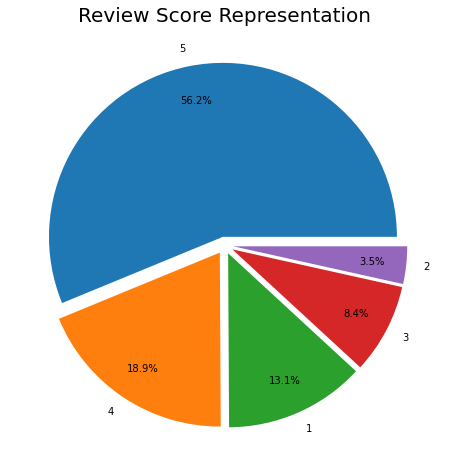

In [16]:
## Merge order_items table with orders table
order_delivery = items.merge(right=orders, on='order_id', how='left')
order_cus_review = order_reviews.merge(right=order_delivery, on='order_id', how='left')

review_score = order_cus_review.value_counts('review_score')
index = review_score.index
sources = review_score.values
plt.figure(figsize=(8, 8))  # Increase the figure size
plt.title('Review Score Representation', fontsize=20)
plt.pie(sources, labels=index,
        explode=[0.05, 0.05, 0.05, 0.05, 0.05],
        autopct=lambda x: str(np.round(x, 1)) + '%',
        pctdistance=0.8,
        labeldistance=1.1,
        )
plt.rc('font', size=12)
plt.show()

### The majority of customers express satisfaction with the service provided, as evident from the high number of 4 and 5 ratings received. Conversely, a significant portion of customers has given a rating of 1, indicating their disappointment with the service. It is worth noting that 75.1% of customers appear to be satisfied, providing ratings of 4 and above. However, 16.6% of customers express dissatisfaction, giving ratings of 2 and below.

### This distribution reveals that a considerable portion of the customer base perceives the service positively, while a notable segment holds negative sentiments. The high percentage of satisfied customers highlights the effectiveness of the service in meeting their expectations. However, it is crucial to address the concerns of the dissatisfied customers to enhance overall customer satisfaction and loyalty.


In [17]:
product_reviews = pd.merge(product_order_merge_df,order_reviews)

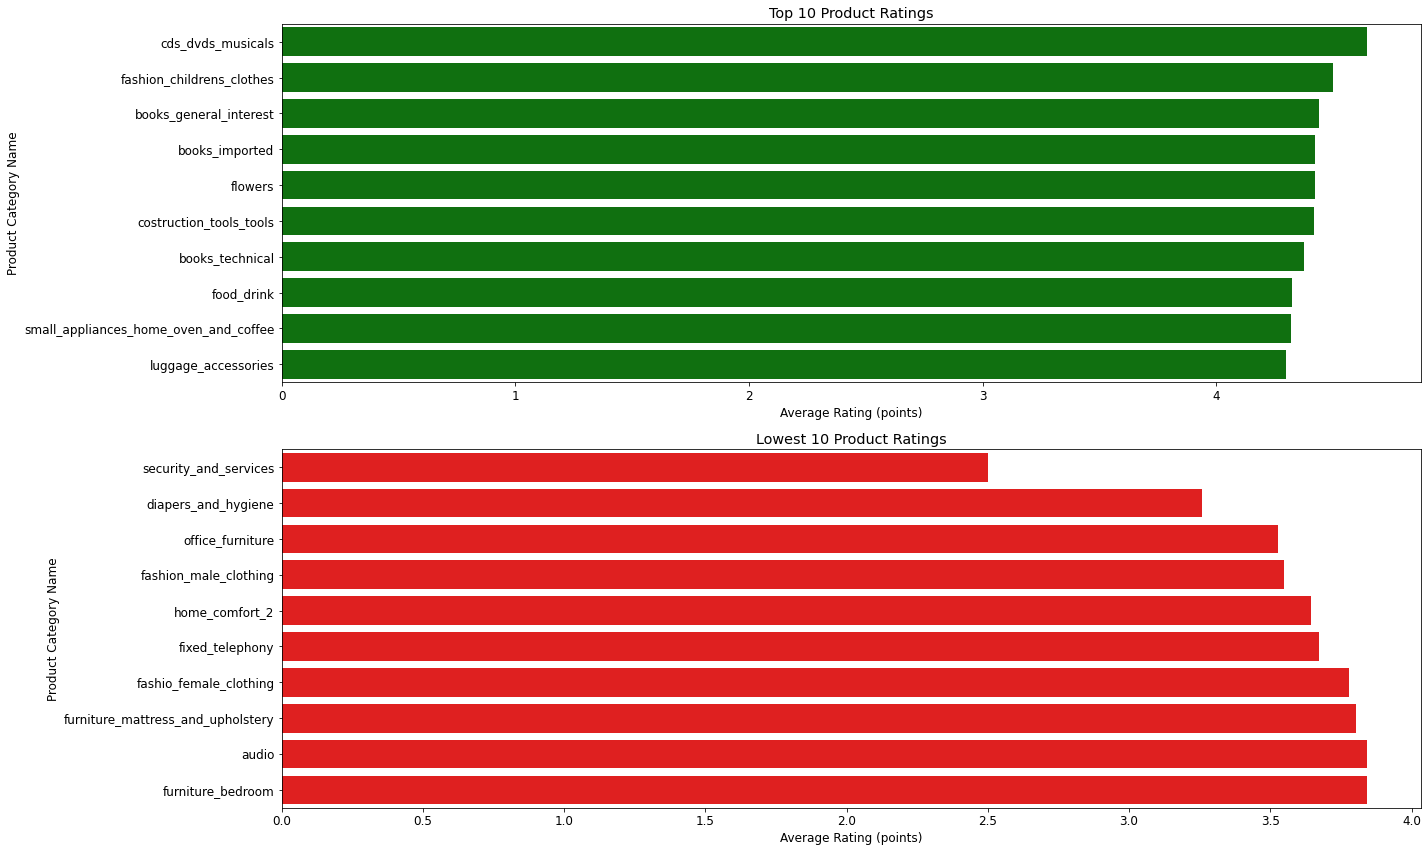

In [18]:
# Calculate mean review score per product category
prd_rev_means = df.groupby('product_category_name_english').mean()['review_score'].reset_index()

# Sort and select top and lowest 10 ratings
top_10_ratings = prd_rev_means.sort_values('review_score', ascending=False).nlargest(10, 'review_score')
lowest_10_ratings = prd_rev_means.sort_values('review_score', ascending=True).nsmallest(10, 'review_score')

# Set colors
green_color = 'green'
red_color = 'red'

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 1, figsize=(20, 12))

# Plot 1: Top 10 Product Ratings
plt.subplot(211)
sns.barplot(data=top_10_ratings, x='review_score', y='product_category_name_english', color=green_color)
plt.title('Top 10 Product Ratings')
plt.xlabel('Average Rating (points)')
plt.ylabel('Product Category Name')

# Plot 2: Lowest 10 Product Ratings
plt.subplot(212)
sns.barplot(data=lowest_10_ratings, x='review_score', y='product_category_name_english', color=red_color)
plt.title('Lowest 10 Product Ratings')
plt.xlabel('Average Rating (points)')
plt.ylabel('Product Category Name')

plt.tight_layout()  # Adjust the spacing between subplots

plt.show()

### Product Analisys

In [19]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [20]:
products.dropna(inplace=True)
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

##### Make a table of the most ordered categories each year

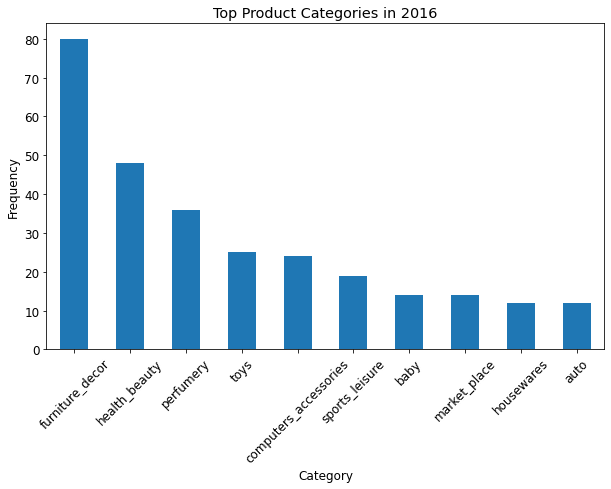

In [21]:
product_categories = df['product_category_name_english']
df['order_year'] = pd.to_datetime(df['order_purchase_timestamp']).dt.year

# Filter data for each year (2016, 2017, 2018)
df_2016 = df[df['order_year'] == 2016]
df_2017 = df[df['order_year'] == 2017]
df_2018 = df[df['order_year'] == 2018]

# Get top categories for each year
top_categories_2016 = df_2016['product_category_name_english'].value_counts().head(10)
top_categories_2017 = df_2017['product_category_name_english'].value_counts().head(10)
top_categories_2018 = df_2018['product_category_name_english'].value_counts().head(10)

# Plot for 2016
plt.figure(figsize=(10, 6))
top_categories_2016.plot(kind='bar')
plt.title('Top Product Categories in 2016')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


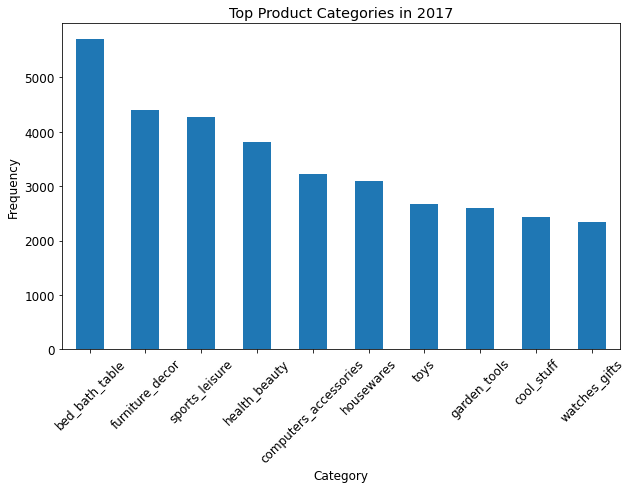

In [22]:
# Plot for 2017
plt.figure(figsize=(10, 6))
top_categories_2017.plot(kind='bar')
plt.title('Top Product Categories in 2017')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

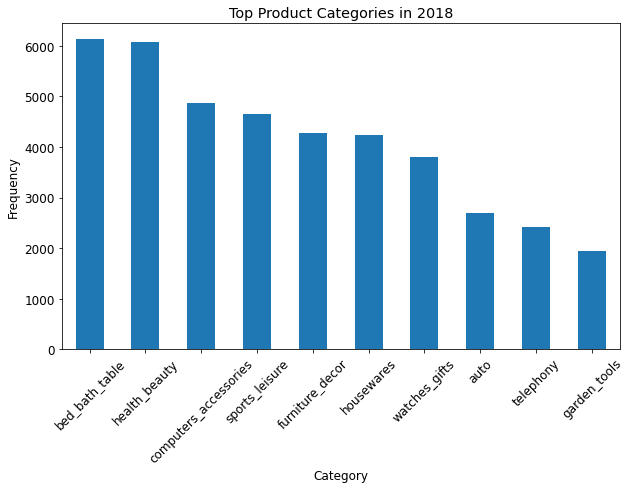

In [23]:
# Plot for 2018
plt.figure(figsize=(10, 6))
top_categories_2018.plot(kind='bar')
plt.title('Top Product Categories in 2018')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

 In 2016, the three most popular product categories were "Furniture & Decor," "Health & Beauty," and "Perfumery." In 2017, the three most popular product categories were "Bed, Bath & Table," "Furniture & Decor," and "Sports & Leisure." In 2018, the three most popular product categories were "Bed, Bath & Table," "Health & Beauty," and "Computer Accessories."

### Based on the observed trends depicted in the aforementioned graphs, a notable upswing in the sales of bed, bath, and table products becomes evident. Further investigation online revealed that during the period spanning 2016-2018, a new administration, under the helm of a prime minister, implemented extensive economic reforms that resulted in substantial economic growth in Brazil, concurrently bolstering the disposable income of its populace. Consequently, the following recommendations are proposed:

### 1. Capitalize on Increased Disposable Income: Acknowledge the augmented purchasing power stemming from economic growth among Brazilian consumers. Tailor marketing messages to underscore the affordability, durability, and value proposition of your bed, bath, and table products. Articulate how investing in these products can enhance the overall quality of life and comfort experienced by consumers.

### 2. Target the Hospitality and Tourism Sector: Recognize the flourishing tourism industry in Brazil and the ensuing demand for bed and bath products from hotels, resorts, and vacation rentals. Contemplate the development of specific product lines or promotional strategies tailored to this segment. Highlight the durability, ease of maintenance, and superior quality of your offerings, aligning with the requisites of the hospitality industry.

### 3. Harness the Potential of Digital Marketing and Social Media: Leverage online platforms and social media channels to effectively reach a broad audience within the Brazilian market. Craft compelling content that showcases the versatility, style, and functionality of your bed, bath, and table products. Foster user-generated content and forge collaborations with influencers to cultivate an atmosphere of authenticity and instill trust among consumers.

### Payment Analisys

In [24]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [25]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [26]:
# merge elements of the data frame (order_payments, orders) to know the trend of the payment method of the customers
pay = pd.merge(payments, orders, on="order_id")
pay["payment_type"] = pay["payment_type"].str.capitalize()
#Grouping for pie chart, what is the most used payment method?
pay1 = pay.groupby(by=["payment_type"]).agg({"order_id": "count","payment_value": "sum"}).reset_index().sort_values(by="order_id",ascending=False)

#### Payments methos and installements distribution

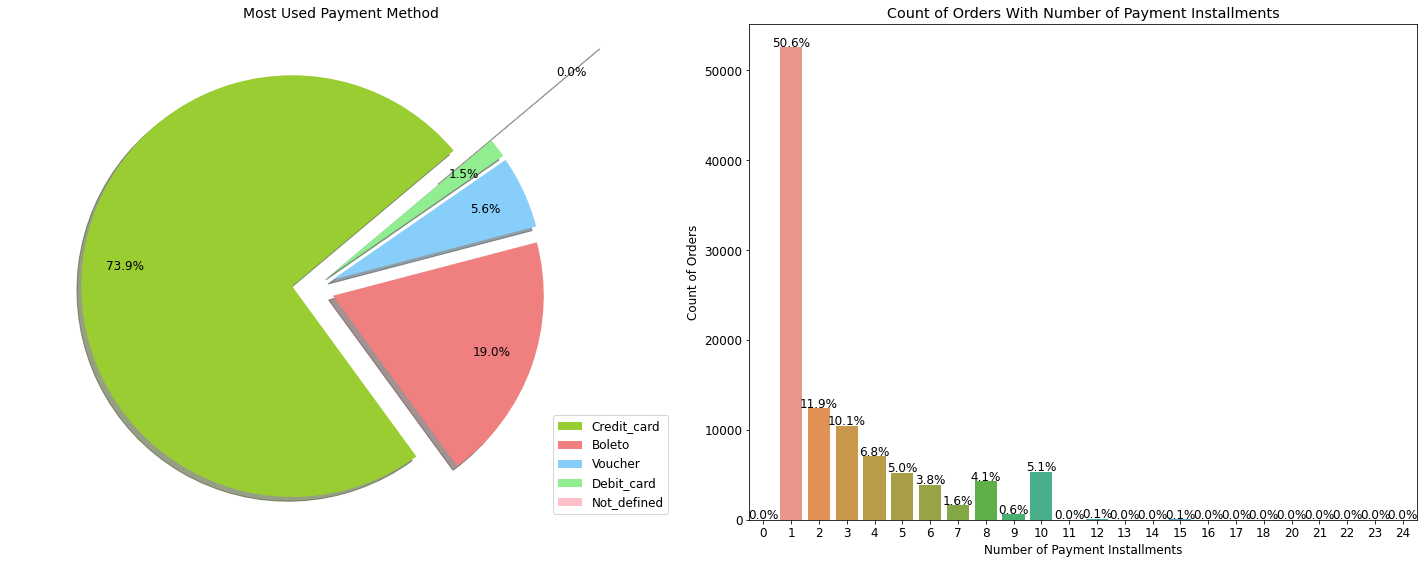

In [27]:
# First plot - Pie chart
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(1, 2, 1)

colors_list = ['yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode = (0.1, 0.1, 0.1, 0.1, 0.8)

ax1.pie(pay1["order_id"], explode=explode, autopct='%1.1f%%', shadow=True, startangle=40, pctdistance=0.8, colors=colors_list)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels=pay1["payment_type"], loc='best')
ax1.set_title("Most Used Payment Method", size=14, color='black')

# Second plot - Bar plot
ax2 = fig.add_subplot(1, 2, 2)

ax2 = sns.barplot(data=payments['payment_installments'].value_counts().reset_index(),
                  x='index', y='payment_installments')

plt.title('Count of Orders With Number of Payment Installments')
plt.xlabel('Number of Payment Installments')
plt.ylabel('Count of Orders')

total = len(payments['payment_installments'])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2, height + 100, f'{height/total:.1%}', ha='center')

plt.tight_layout()  # Adjust spacing between subplots

# Show the plots
plt.show()


### Based on the data presented, it can be deduced that nearly three-fourths of customers prefer utilizing credit cards as their primary payment method. Additionally, an analysis reveals that 50 percent of customers opt for a single payment to settle their transactions with the business. These findings lead us to draw the following conclusions:

### Credit Card Dominance: With 73.9% of customers using credit cards as their preferred payment method, businesses should prioritize offering credit card payment options to cater to customer preferences for convenience, security, and cashless transactions.

### Affordability and Financial Flexibility: The fact that 50.6% of customers make a single payment indicates that customers have the financial means to pay upfront. To capitalize on this, businesses can offer competitive pricing and value to attract customers who prefer full payments, while also providing flexible pricing options like discounts or installment plans to cater to different customer preferences.

### Potential Market Segments: Understanding the distinct customer segments within the credit card user base can inform targeted marketing strategies. By analyzing customers who make single payments versus multiple payments, businesses can tailor their messaging, offers, and payment options to better meet the specific needs and preferences of each segment, maximizing customer engagement and sales potential.

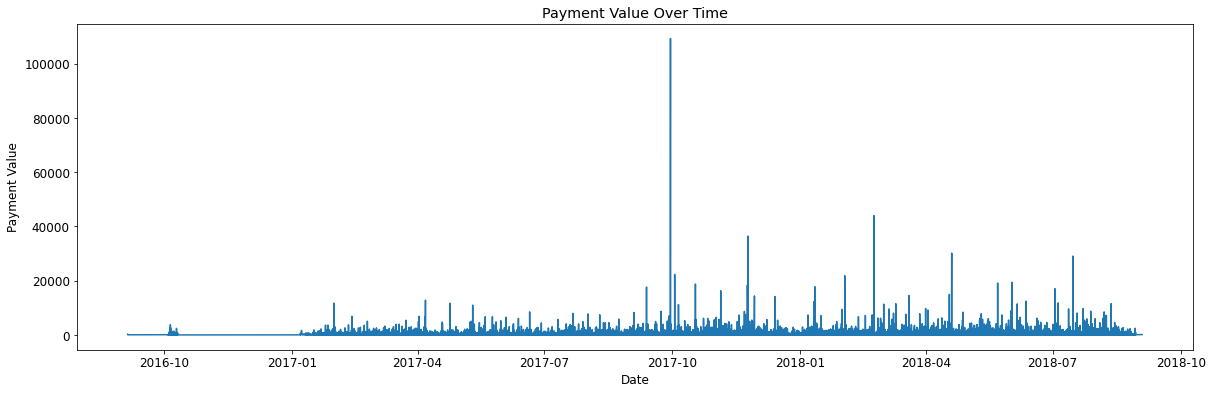

In [28]:
# Convert 'order_purchase_timestamp' to datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Group data by 'order_purchase_timestamp' and calculate sum of 'payment_value'
payment_over_time = df.groupby('order_purchase_timestamp')['payment_value'].sum()

# Create a line plot
plt.figure(figsize=(20, 6))
sns.lineplot(data=payment_over_time)
plt.title('Payment Value Over Time')
plt.xlabel('Date')
plt.ylabel('Payment Value')
plt.show()

 To enhance the interpretability of the graph's data, it is advisable to partition the information into weekly and monthly segments. This segmentation approach will help mitigate the noise and enable more comprehensive analysis.

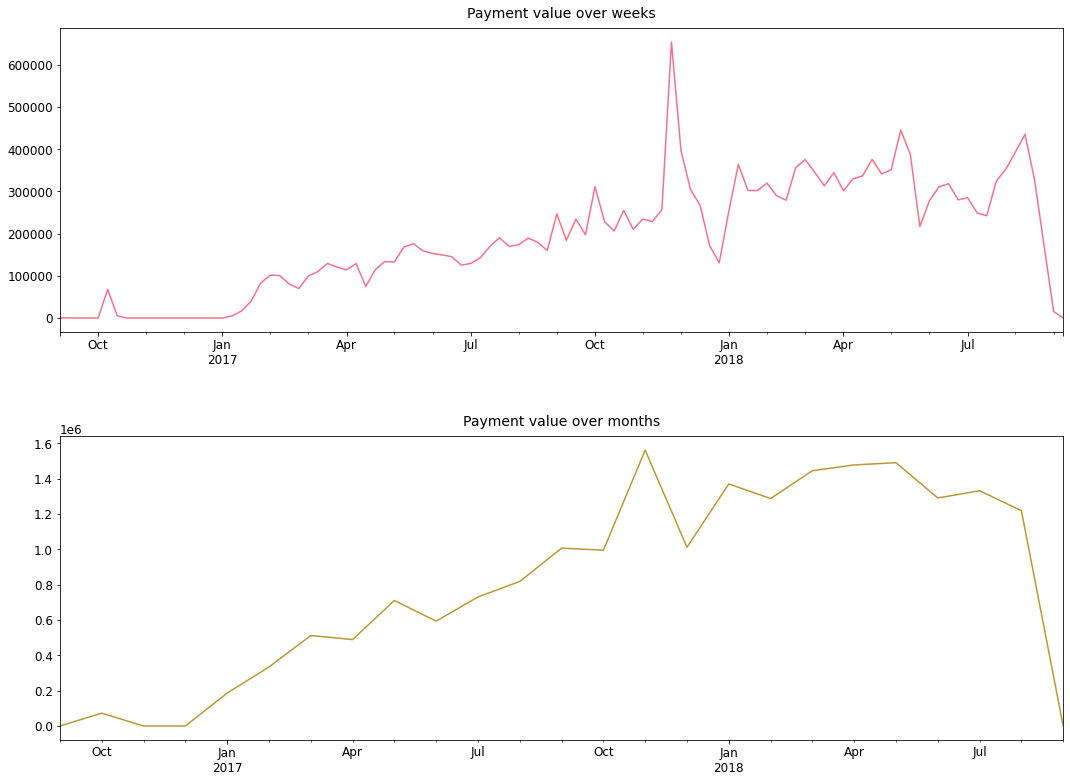

In [29]:
#Creating other copy of merged_df 
data_2 = df.copy(deep = True)

#Setting a index before resample the dataframe to month and week level
data_2 = data_2.set_index('order_purchase_timestamp')

plt.figure(figsize=(16, 12))
colors = sns.color_palette('husl')

# First plot
plt.subplot(2, 1, 1)
data_2['payment_value'].resample('W').sum().plot(color=colors[0])
plt.title('Payment value over weeks', fontsize=14, pad=10.5)
plt.xlabel(None)

# Second plot
plt.subplot(2, 1, 2)
data_2['payment_value'].resample('M').sum().plot(color=colors[1])
plt.title('Payment value over months', fontsize=14, pad=10.5)
plt.xlabel(None)

plt.tight_layout(pad=4)
plt.show()

### The presented trend graphs illustrate the payment values to the company over weeks and months. A clear pattern emerges across both graphs, revealing similar trends. From January to March, there is a moderate increase in sales, followed by a slight decrease or static phase around March. Subsequently, a decrease is observed between April and the end of June, followed by an increase in August and another decrease in September. Finally, there is a surge in sales from October to December.

### Insights:

### These trends can be attributed to the holiday dates, specifically the months of April to June and October to December, which are characterized by a significant number of holidays. The increase and recurring patterns in sales can be attributed to consumers' shopping behavior during these holiday periods. It is during these times that consumers are more likely to make purchases for gifts and home products, resulting in higher sales volumes.

### Recommendation:

### Considering the impact of holiday seasons on sales, it is advisable for the company to plan and strategize its marketing and sales efforts accordingly. Allocating resources and promotions specifically targeted towards holiday periods, especially during April to June and October to December, can help maximize sales and take advantage of consumer spending patterns during these peak periods.